In [31]:
import scanpy as sc

In [32]:
adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/filtered_preprocessed_combined_adata.h5ad")
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/h5as_files/adata_neu.h5ad")  # Replace with your data file

In [33]:
#PCA
sc.tl.pca(adata, svd_solver="arpack")

In [34]:
#Neighborhood Graph Construction:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


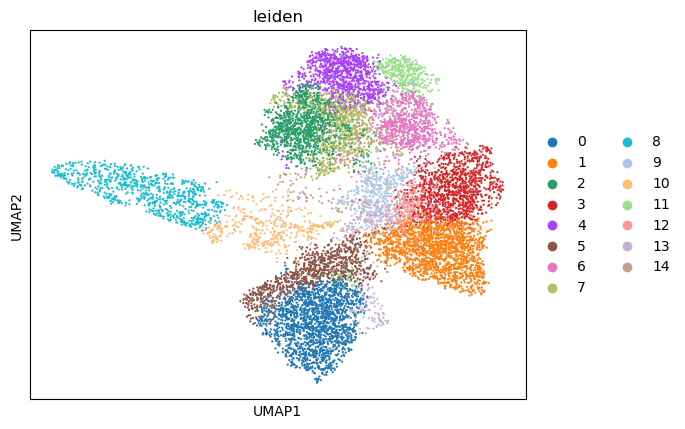

In [35]:
# UMAP
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["leiden"], save="_preprocessing.png")

DEGs für jedes Cluster ausgeben lassen

DEGs for Cluster 13: ('ENSG00000087245', 'ENSG00000146278', 'ENSG00000167641', 'ENSG00000114315', 'ENSG00000198830', 'ENSG00000139211', 'ENSG00000140545', 'ENSG00000101361', 'ENSG00000253300', 'ENSG00000198901', 'ENSG00000154229', 'ENSG00000123416', 'ENSG00000196526', 'ENSG00000106366', 'ENSG00000234741')


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


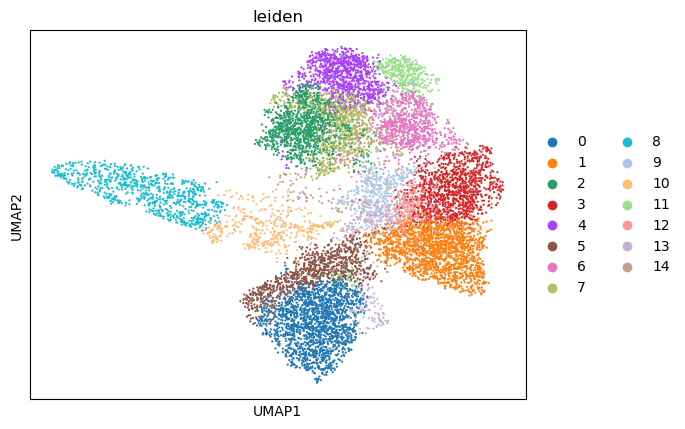

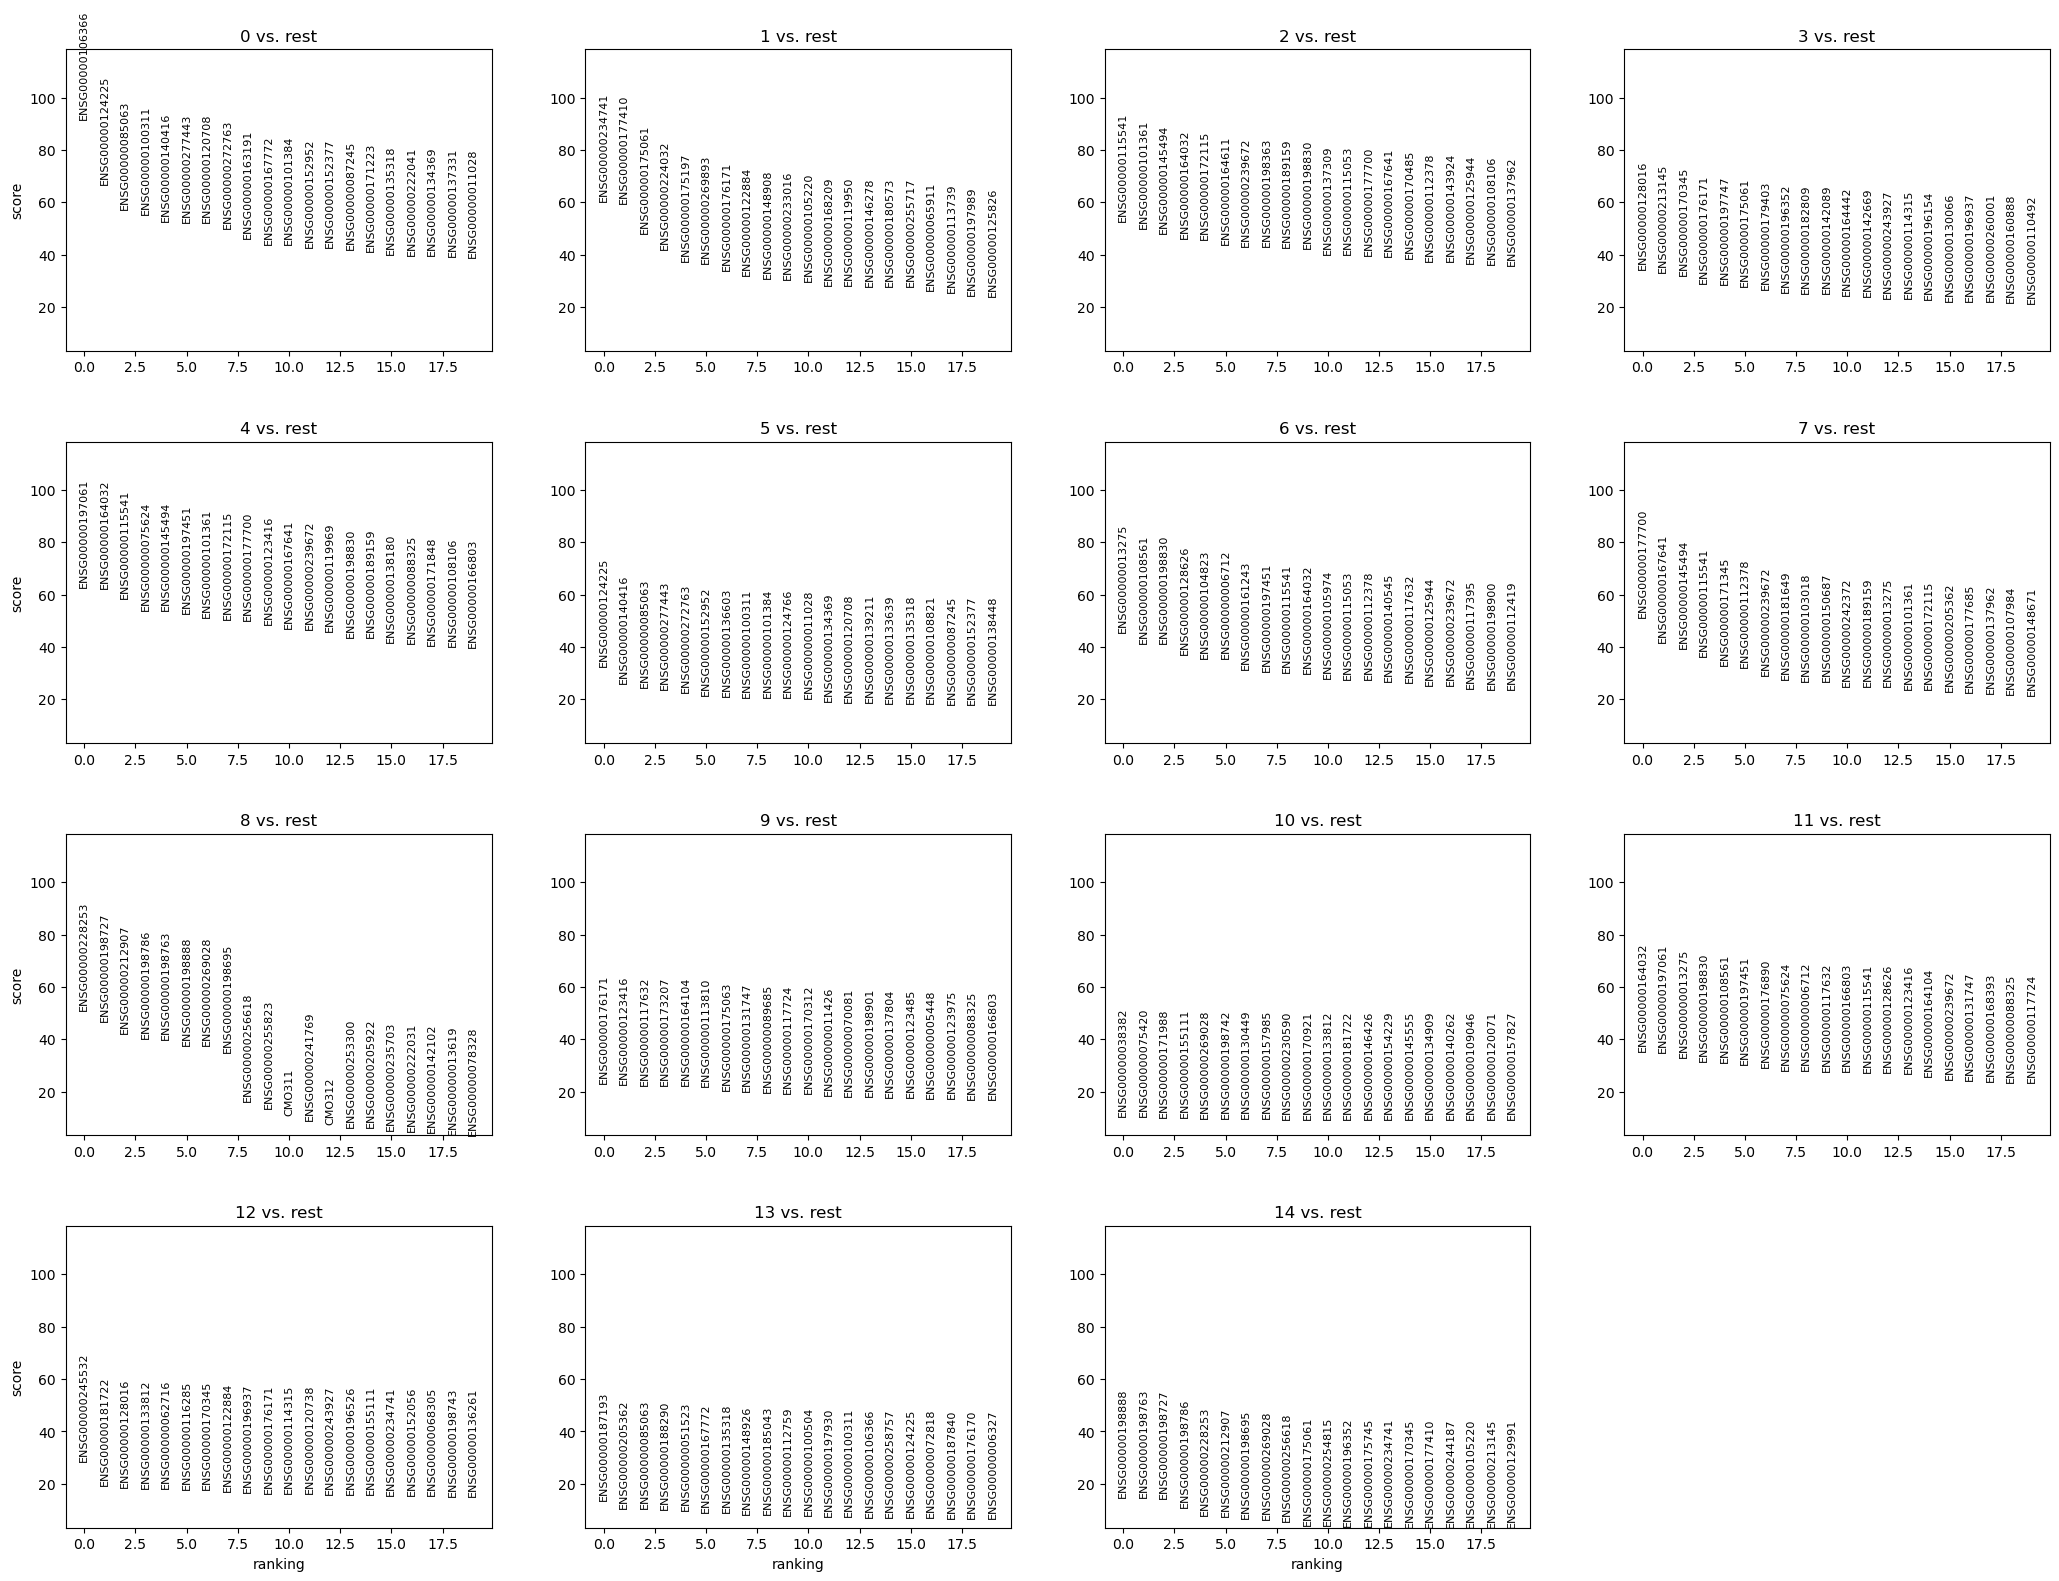

In [37]:
import scanpy as sc
import matplotlib.pyplot as plt

# Annahme: adata ist Ihr anndata-Objekt

# Berechnen von UMAP und Leiden-Clustering
sc.tl.umap(adata)
sc.tl.leiden(adata)

# Berechnen der differentiell exprimierten Gene für jedes Cluster
sc.tl.rank_genes_groups(adata, "leiden", method='t-test', key_added="rank_genes_leiden")

# Hier definieren Sie den gewünschten Cluster-Index, z.B. 0 für den ersten Cluster
cluster_index = 13

# Die differentiell exprimierten Gene für das ausgewählte Cluster abrufen
de_genes = adata.uns["rank_genes_leiden"]["names"][cluster_index]

# Drucken Sie die Liste der differentiell exprimierten Gene aus
print(f"DEGs for Cluster {cluster_index}: {de_genes}")

# Plot von UMAP mit Farbcodierung nach Leiden-Clustern und speichern
sc.pl.umap(adata, color=["leiden"], save="_preprocessing.png")

# Plot von differentiell exprimierten Genen für das ausgewählte Cluster
sc.pl.rank_genes_groups(adata, groupby="leiden", key="rank_genes_leiden", group=cluster_index, save=f"_cluster_{cluster_index}_DEGs.png")

# Zeigen Sie die Plots an
plt.show()


/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


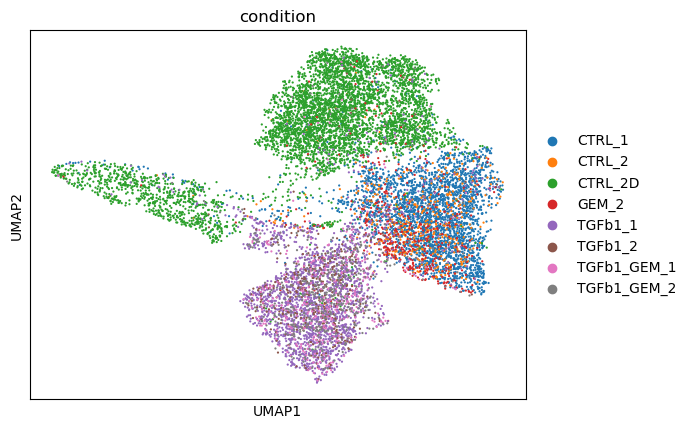

In [38]:
# UMAP
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["condition"], save="_preprocessing.png")

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/tools/_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}
/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


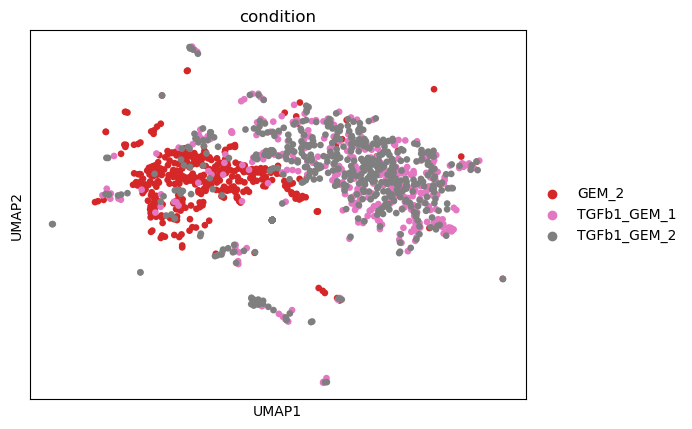

In [39]:
import scanpy as sc

# Annahme: adata enthält deine Daten und wurde bereits geladen/verarbeitet

# Liste der gewünschten Bedingungen
#selected_conditions = ["CTRL_1", 'CTRL_2',"CTRL_2D"]  # Füge hier die Bedingungen hinzu, die du anzeigen möchtest
#selected_conditions = ["CTRL_1", 'CTRL_2',"GEM_2"] 
#selected_conditions = ["CTRL_1", 'CTRL_2',"TGFb1_1",'TGFb1_2'] 
#selected_conditions = ["CTRL_1", 'CTRL_2',"TGFb1_GEM_1",'TGFb1_GEM_2'] 
#selected_conditions = ["TGFb1_1",'TGFb1_2',"TGFb1_GEM_1",'TGFb1_GEM_2'] 
#selected_conditions = ["TGFb1_1",'TGFb1_2',"GEM_2"]
selected_conditions = ["TGFb1_GEM_1",'TGFb1_GEM_2',"GEM_2"]


# Filtere die Daten nach den ausgewählten Bedingungen
adata_selected = adata[adata.obs["condition"].isin(selected_conditions)]

# Führe UMAP-Berechnungen durch
sc.tl.umap(adata_selected)

# Führe Leiden-Clustering durch
sc.tl.leiden(adata_selected)

sc.pl.umap(adata_selected, color=["condition"])

/home2/lumpi/miniconda3/envs/scanpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


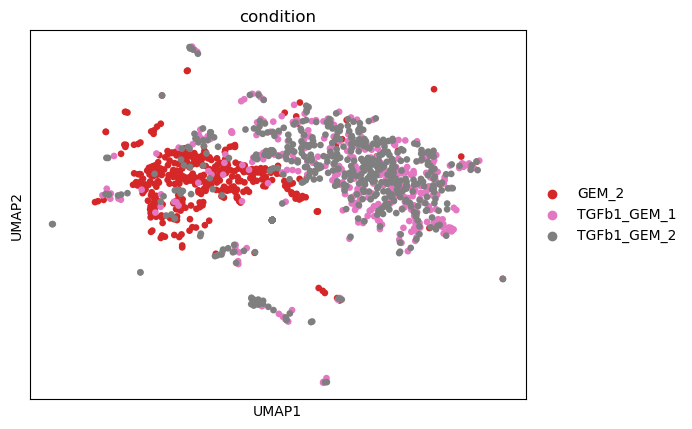

In [40]:
import os
import scanpy as sc
import matplotlib.pyplot as plt

# Speicherpfad für das Plot-Bild
#output_folder = '/storage/users/sac43cg/res_Samantha_1/outs/Figures'
output_folder = '/home2/lumpi/SingleCell_Samantha/scripts/figures'
output_filename = os.path.join(output_folder, 'TGFb1_2_GEM_1_2vsGEM_2_umap_plot_preprocessing.png')

# Überprüfen, ob der Ausgabeordner vorhanden ist, andernfalls erstellen
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Set the Scanpy settings to use the output folder
#sc.settings.figdir = output_folder

# Erstelle die UMAP-Plot und speichere ihn als Bild
#sc.pl.umap(adata_selected, color=["condition"], save=output_filename, dpi=600)
sc.pl.umap(adata_selected, color=["condition"], save="TGFvsGEM_ump.png")

# Speichern des Plots im angegebenen Ordner
#plt.savefig(output_filename, dpi=600)

In [41]:
!pwd

/home2/lumpi/SingleCell_Samantha/scripts
